In [83]:
import numpy as np
import pandas as pd 
import datetime

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
# pd.set_option('display.max_columns', None)

In [84]:
price_panel_quarterly = pd.read_csv('price_panel_quarter.csv', index_col = 0)
pbr_quarterly=pd.read_csv('pbr_quarter.csv',index_col=0,parse_dates=True)
pbr_quarterly=pbr_quarterly.iloc[5:]


In [85]:
def portfolio_construction(price_panel_quarterly,pbr_quarterly,start,end):
    rtn=np.log(price_panel_quarterly/price_panel_quarterly.shift(1))*100
    
    rtn=rtn.iloc[1:]
    pbr_quarterly=pbr_quarterly.iloc[1:]
    date_return=dict()
    #rtn=rtn.reindex(pbr_quarterly.index)
    for i in range(len(pbr_quarterly)):
        winners=pbr_quarterly.iloc[i].dropna().rank(method='first',ascending=False)\
            [(pbr_quarterly.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
            (pbr_quarterly.iloc[i].dropna().rank(method='first',ascending=False)>start)].index.values
        winners=list(winners)
        date_return[rtn.index[i]]=\
             [[np.dot(rtn.iloc[i].reindex(winners).fillna(-99).values,np.array([1/len(winners) for i in range(len(winners))]))],winners]

    return date_return

In [86]:
high_pbr=portfolio_construction(price_panel_quarterly=price_panel_quarterly,pbr_quarterly=pbr_quarterly,start=100,end=300)
middle_pbr=portfolio_construction(price_panel_quarterly=price_panel_quarterly,pbr_quarterly=pbr_quarterly,start=300,end=500)
low_pbr=portfolio_construction(price_panel_quarterly=price_panel_quarterly,pbr_quarterly=pbr_quarterly,start=500,end=700)


In [87]:
print('high_pbr')
for i in range(1,len(high_pbr.keys())):
    print(list(high_pbr.keys())[i])
    sub=len([x for x in high_pbr[list(high_pbr.keys())[i]][1] if x not in high_pbr[list(high_pbr.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_pbr[list(high_pbr.keys())[i-1]][1])}')
    print('편입',[x for x in high_pbr[list(high_pbr.keys())[i]][1] if x not in high_pbr[list(high_pbr.keys())[i-1]][1]])
    print('퇴출',[x for x in high_pbr[list(high_pbr.keys())[i-1]][1] if x not in high_pbr[list(high_pbr.keys())[i]][1]])



high_pbr
2009-06-30
교체비율: 0.34673366834170855
편입 ['010520', '016160', '025560', '096770', '010580', '071970', '000660', '004940', '037620', '010960', '033240', '097950', '011170', '011930', '005870', '011200', '044380', '012690', '004870', '011760', '031440', '010050', '008250', '001780', '004430', '006400', '003650', '000120', '032560', '022520', '011150', '006120', '004540', '089470', '079660', '011330', '003670', '002380', '002870', '011230', '019680', '055550', '011050', '008080', '004410', '009540', '084670', '015020', '015540', '024090', '002360', '005270', '030610', '006040', '001520', '004490', '023530', '042660', '077970', '002780', '012610', '003550', '007460', '000150', '034020', '014130', '042670', '069470', '074610']
퇴출 ['000670', '029530', '012280', '001500', '000420', '036420', '078930', '032390', '017800', '023590', '003570', '017180', '009310', '005740', '000470', '001570', '009160', '035000', '010950', '067250', '016420', '051310', '010040', '002390', '002320', '03000

In [88]:
print('middle_pbr')
for i in range(1,len(middle_pbr.keys())):
    print(list(middle_pbr.keys())[i])
    sub=len([x for x in middle_pbr[list(middle_pbr.keys())[i]][1] if x not in middle_pbr[list(middle_pbr.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( middle_pbr[list(middle_pbr.keys())[i-1]][1])}')
    print('편입',[x for x in middle_pbr[list(middle_pbr.keys())[i]][1] if x not in middle_pbr[list(middle_pbr.keys())[i-1]][1]])
    print('퇴출',[x for x in middle_pbr[list(middle_pbr.keys())[i-1]][1] if x not in middle_pbr[list(middle_pbr.keys())[i]][1]])

middle_pbr
2009-06-30
교체비율: 0.36683417085427134
편입 ['000670', '029530', '000050', '006490', '025820', '078930', '081000', '006650', '008540', '017800', '023590', '003570', '017180', '009310', '000470', '001570', '009160', '067250', '002390', '002320', '004990', '000760', '008420', '000040', '001420', '002300', '014910', '012030', '001060', '001360', '014590', '010420', '004830', '005750', '016880', '025620', '007590', '000490', '003220', '018670', '009460', '009810', '009270', '001230', '005190', '005070', '014990', '058430', '025750', '006060', '000070', '003620', '009290', '005300', '002240', '010600', '027390', '003540', '001550', '053000', '004360', '033180', '084870', '092230', '051630', '002310', '037270', '004910', '009450', '064960', '008040', '004560', '097230']
퇴출 ['010520', '025560', '010580', '000660', '004940', '033240', '000700', '011170', '003030', '007660', '027740', '000220', '005030', '005870', '012690', '002410', '004870', '036530', '010050', '009720', '008400', '009

In [89]:
print('low_pbr')
for i in range(1,len(low_pbr.keys())):
    print(list(low_pbr.keys())[i])
    sub=len([x for x in low_pbr[list(low_pbr.keys())[i]][1] if x not in low_pbr[list(low_pbr.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_pbr[list(low_pbr.keys())[i-1]][1])}')
    print('편입',[x for x in low_pbr[list(low_pbr.keys())[i]][1] if x not in low_pbr[list(low_pbr.keys())[i-1]][1]])
    print('퇴출',[x for x in low_pbr[list(low_pbr.keys())[i-1]][1] if x not in low_pbr[list(low_pbr.keys())[i]][1]])

low_pbr
2009-06-30
교체비율: 0.24120603015075376
편입 ['018415', '001685', '016575', '084695', '012280', '000700', '003030', '007660', '027740', '000220', '005030', '002410', '036530', '002540', '009720', '009280', '004740', '002880', '001470', '005740', '005420', '001390', '001620', '007280', '075180', '033660', '003965', '009190', '012600', '005880', '002810', '004450', '013580', '007340', '096760', '000480', '015260', '007210', '015360', '023450', '001790', '002210', '000320', '005010', '005960', '000590', '001020', '017370']
퇴출 ['016160', '000050', '007050', '025820', '006650', '044380', '008540', '001970', '003990', '000760', '001420', '002300', '012030', '014590', '004830', '005750', '004820', '011050', '000490', '008080', '009460', '009810', '005190', '015020', '005070', '058430', '025750', '006060', '000070', '003620', '010600', '013200', '027390', '001600', '053000', '004230', '001190', '084870', '092230', '000790', '009690', '002310', '037270', '004910', '084680', '009450', '069470

In [107]:
import pandas_datareader.naver as web_naver
start = '2008-09-30'
end = '2021-12-31'
kospi=web_naver.NaverDailyReader(symbols='KOSPI', start=start,end=end,adjust_price=True)
kospi=kospi.read()
kospi=kospi.astype(float)
kospi=kospi['Close']
kospi=kospi.loc[list(pbr_quarterly.index)]


In [113]:
portfolio=pd.DataFrame(index=price_panel_quarterly.index)
portfolio['high_pbr']=pd.Series(np.array([rtn[0] for rtn in list(high_pbr.values())]).flatten(),index=high_pbr.keys())
portfolio['middle_pbr']=pd.Series(np.array([rtn[0] for rtn in list(middle_pbr.values())]).flatten(),index=middle_pbr.keys())
portfolio['low_pbr']=pd.Series(np.array([rtn[0] for rtn in list(low_pbr.values())]).flatten(),index=low_pbr.keys())
portfolio['KOSPI']=np.log(kospi/kospi.shift(1)).values*100

In [116]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_pbr      2.825553
middle_pbr    0.200129
low_pbr      -1.826350
KOSPI         1.872736
dtype: float64

std 
 high_pbr      8.979190
middle_pbr    9.371183
low_pbr       9.794236
KOSPI         8.082488
dtype: float64

skewness 
 high_pbr     -0.484025
middle_pbr   -0.716738
low_pbr      -0.686173
KOSPI        -0.301825
dtype: float64

kurtosis 
 high_pbr      1.168333
middle_pbr    2.515774
low_pbr       2.771085
KOSPI         1.532636
dtype: float64

sharpe ratio 
 high_pbr      0.314678
middle_pbr    0.021356
low_pbr      -0.186472
KOSPI         0.231703
dtype: float64


<AxesSubplot:xlabel='Date'>

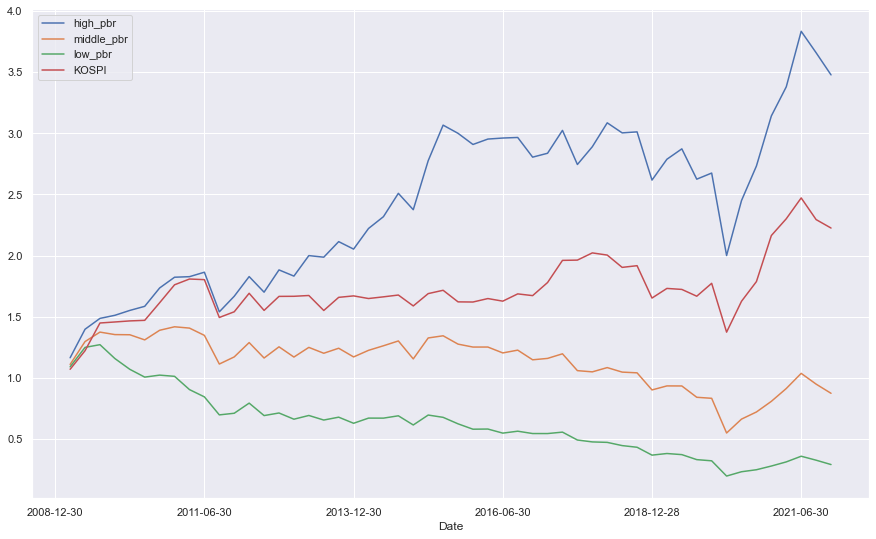

In [117]:
cum_rtn=portfolio[['high_pbr','middle_pbr','low_pbr','KOSPI']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))